Install it if you don’t have this library.

In [1]:
%pip install scikit-learn
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df=pd.read_csv('insurance_dataset.csv')
df.head()

,Age,Gender,Bmi,Children,Smoker,Region,Medical_history,Family_medical_history,Exercise_frequency,Occupation,Coverage_level,Charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
df.columns

Index(['Age', 'Gender', 'Bmi', 'Children', 'Smoker', 'Region',
       'Medical_history', 'Family_medical_history', 'Exercise_frequency',
       'Occupation', 'Coverage_level', 'Charges'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Age                     1000000 non-null  int64  
 1   Gender                  1000000 non-null  object 
 2   Bmi                     1000000 non-null  float64
 3   Children                1000000 non-null  int64  
 4   Smoker                  1000000 non-null  object 
 5   Region                  1000000 non-null  object 
 6   Medical_history         749238 non-null   object 
 7   Family_medical_history  749596 non-null   object 
 8   Exercise_frequency      1000000 non-null  object 
 9   Occupation              1000000 non-null  object 
 10  Coverage_level          1000000 non-null  object 
 11  Charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [6]:
df.describe()

,Age,Bmi,Children,Charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [7]:
df.isnull().sum()

Age                            0
Gender                         0
Bmi                            0
Children                       0
Smoker                         0
Region                         0
Medical_history           250762
Family_medical_history    250404
Exercise_frequency             0
Occupation                     0
Coverage_level                 0
Charges                        0
dtype: int64

In [8]:
target_col = "Charges"
X = df.drop(columns=[target_col])
y = df[target_col]

In [9]:
df.head()

,Age,Gender,Bmi,Children,Smoker,Region,Medical_history,Family_medical_history,Exercise_frequency,Occupation,Coverage_level,Charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [10]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [11]:
df.head()

,Age,Gender,Bmi,Children,Smoker,Region,Medical_history,Family_medical_history,Exercise_frequency,Occupation,Coverage_level,Charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [12]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [13]:
df.head()

,Age,Gender,Bmi,Children,Smoker,Region,Medical_history,Family_medical_history,Exercise_frequency,Occupation,Coverage_level,Charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [14]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lin_model = Pipeline(steps=[("preprocessor", preprocessor),("regressor", LinearRegression())])
lin_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
rf_model = Pipeline(steps=[("preprocessor", preprocessor),("regressor", RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name} Performance:")
    print(f" RMSE: {rmse:.2f}")
    print(f" MAE: {mae:.2f}")
    print(f" R²: {r2:.2f}\n")

In [20]:
evaluate(lin_model, X_test, y_test, "Linear Regression")
evaluate(rf_model, X_test, y_test, "Random Forest")

Linear Regression Performance:
 RMSE: 1826.07
 MAE: 1437.39
 R²: 0.83

Random Forest Performance:
 RMSE: 1937.62
 MAE: 1466.44
 R²: 0.81



Histograms for Numeric Features

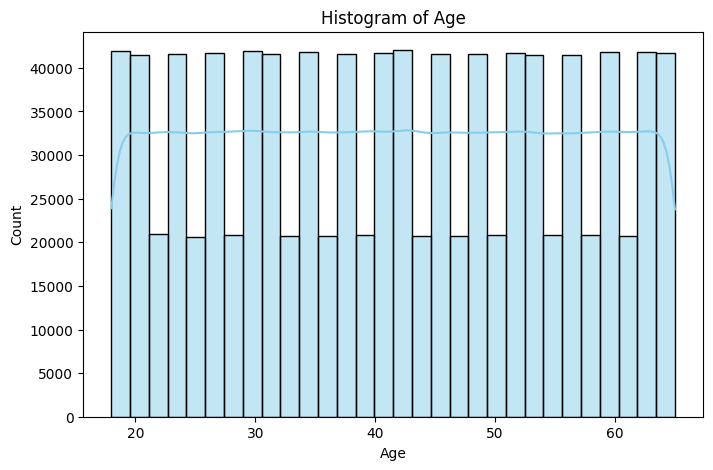

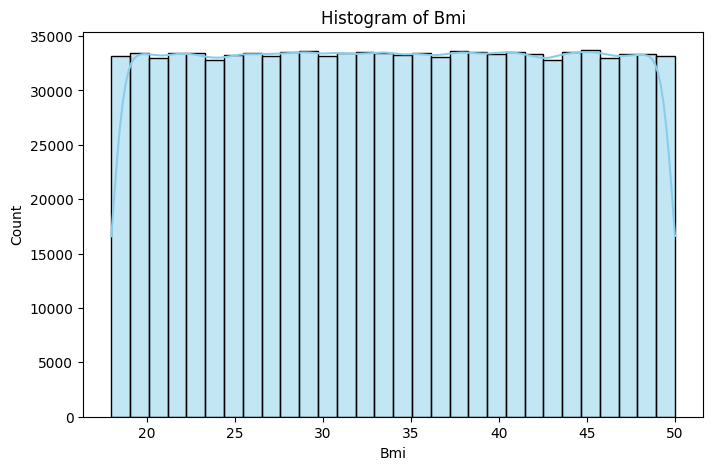

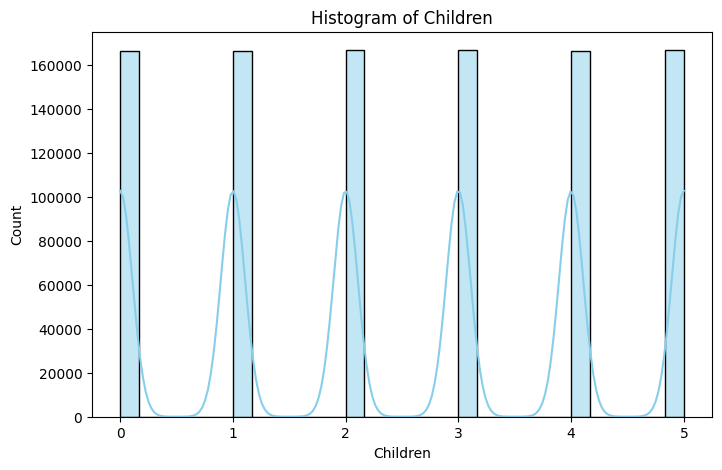

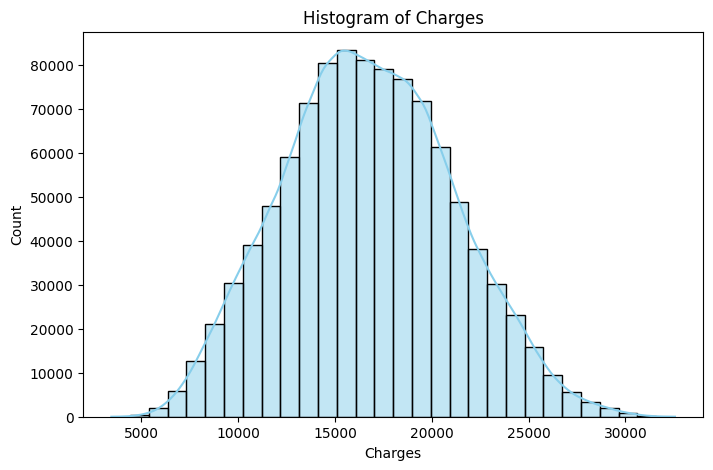

In [ ]:
for col in num_cols + [target_col]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.show()
    plt.close()

Boxplots for Numeric Features

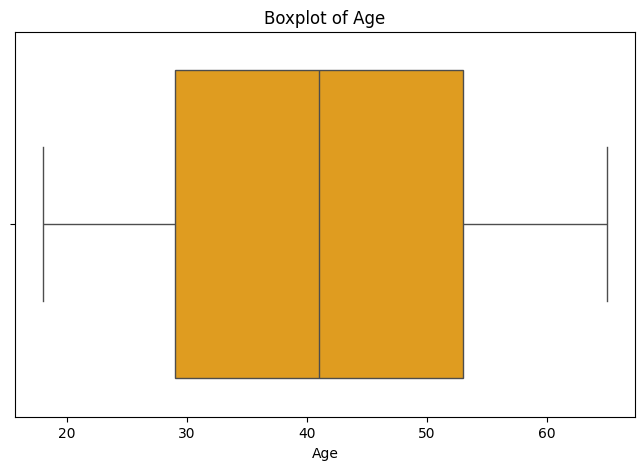

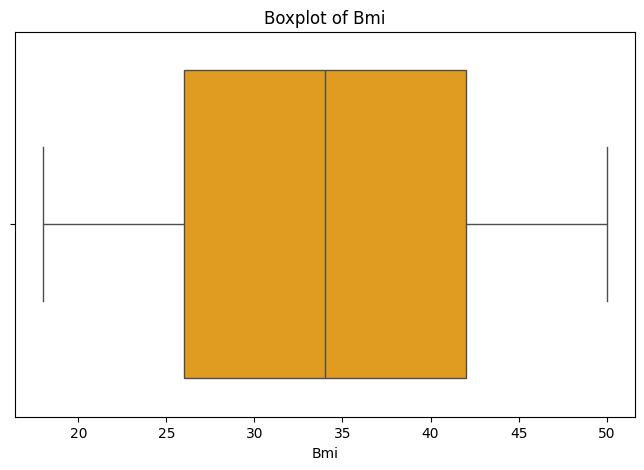

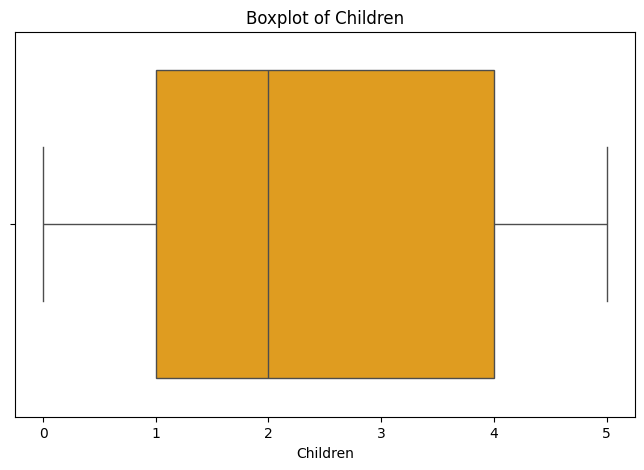

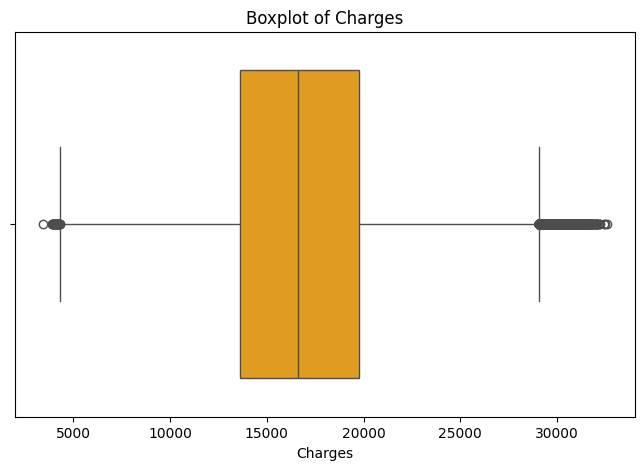

In [ ]:
for col in num_cols + [target_col]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot of {col}")
    plt.show()
    plt.close()

Scatter Plots vs. Target (Charges)

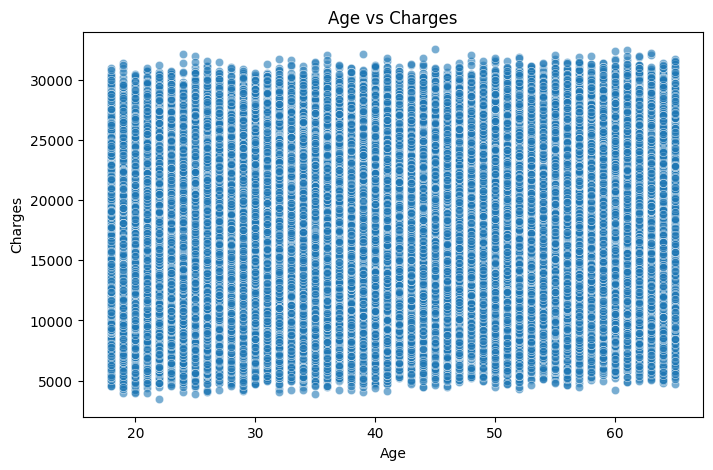

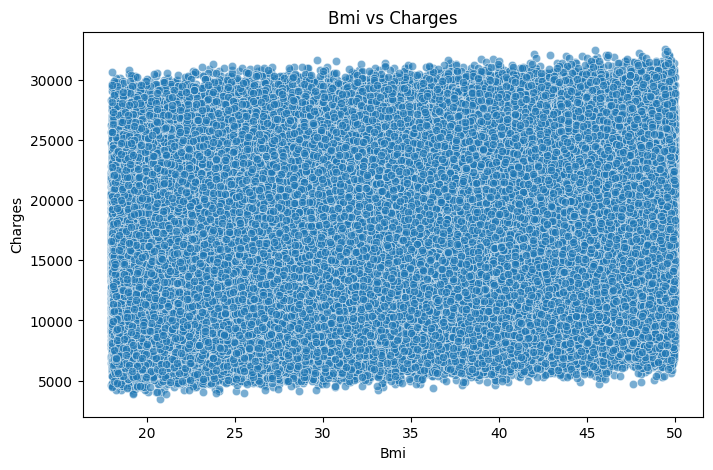

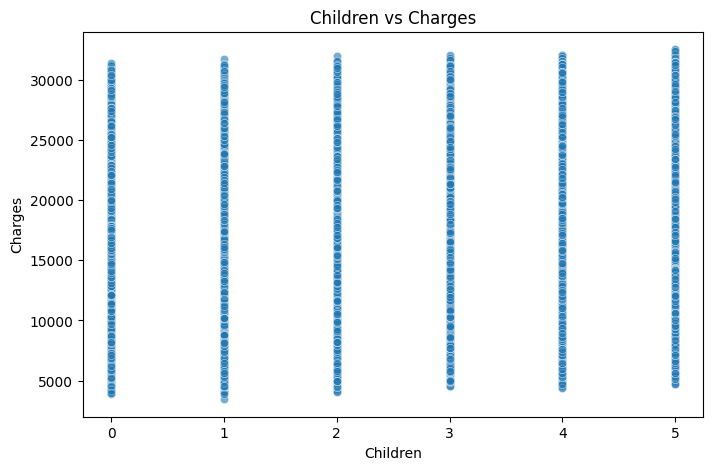

In [ ]:
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[col], y=df[target_col], alpha=0.6)
        plt.title(f"{col} vs {target_col}")
        plt.show()
        plt.close()

Bar Charts for Categorical Features

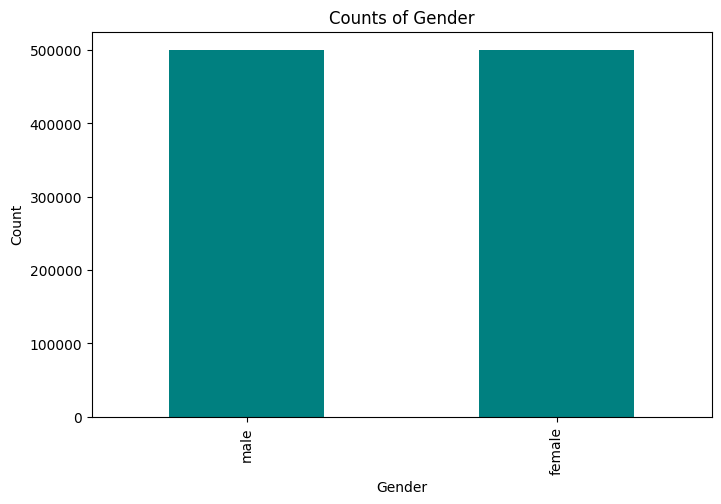

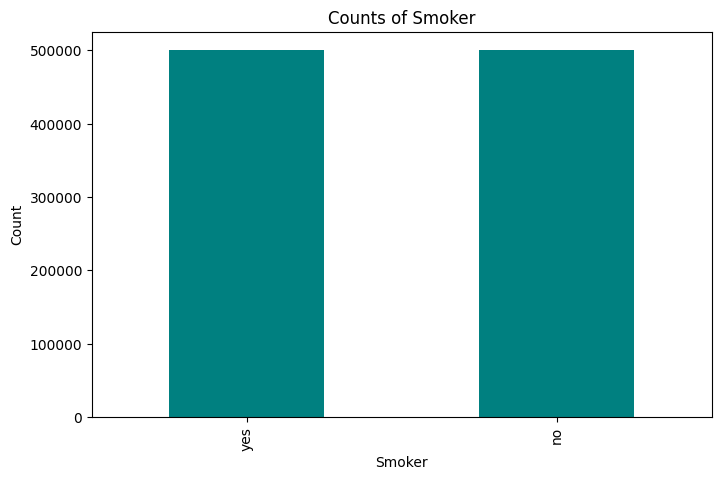

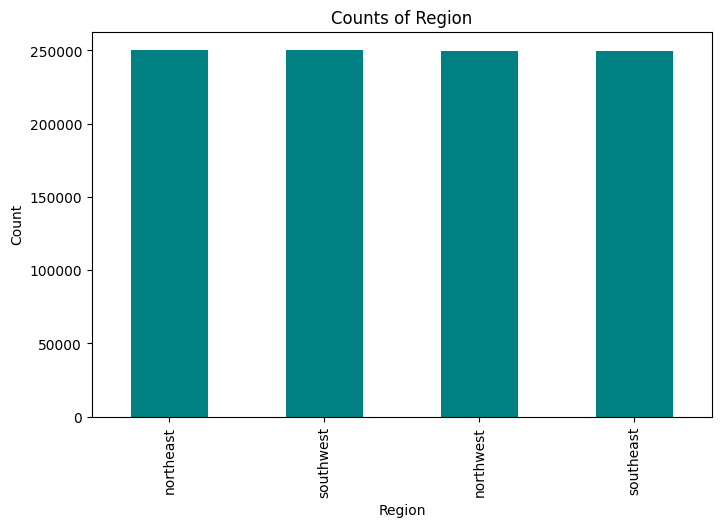

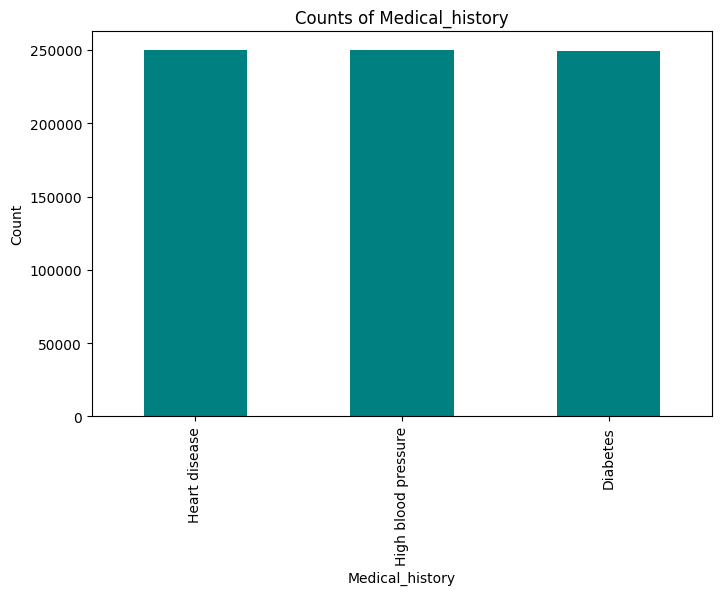

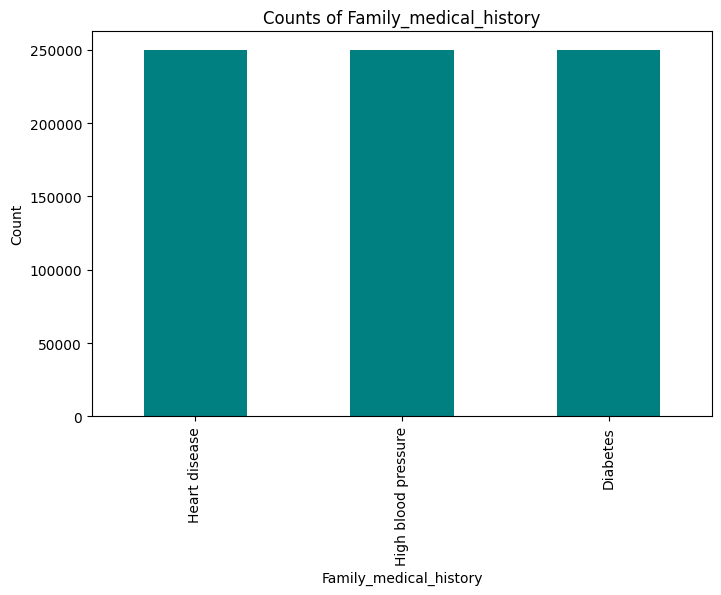

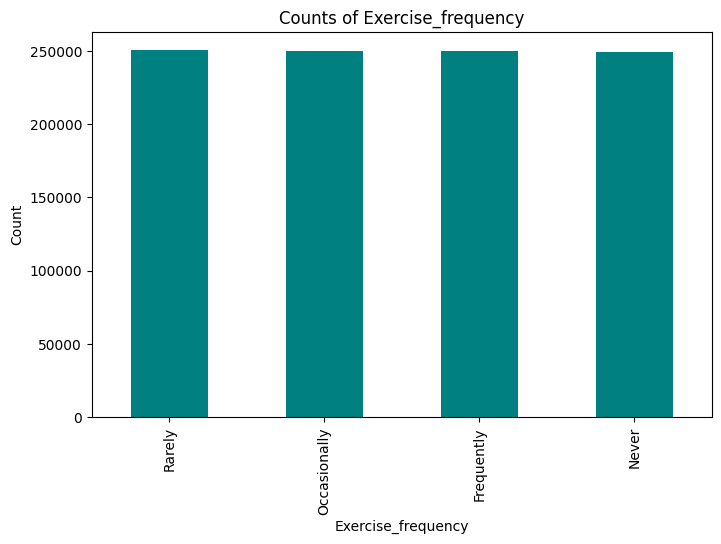

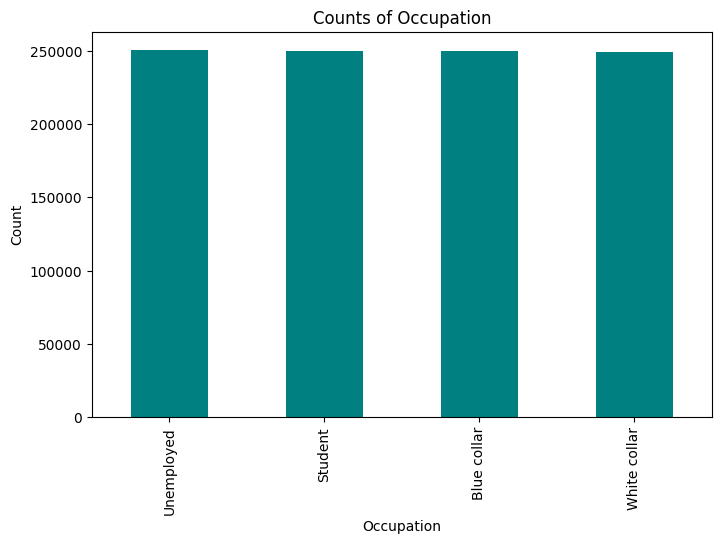

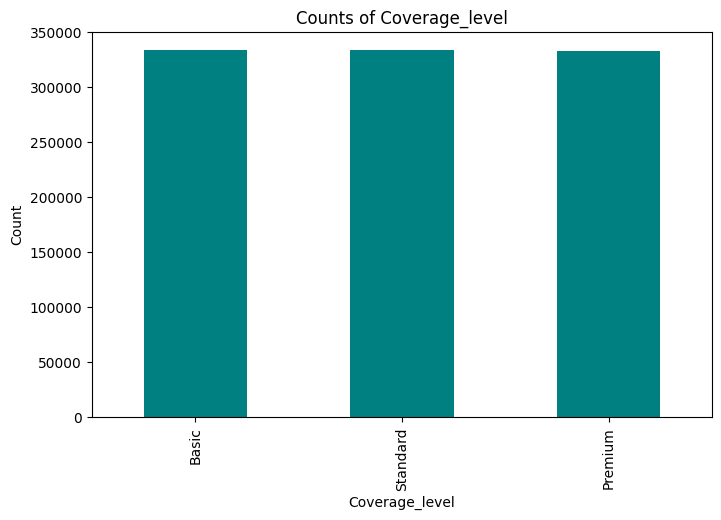

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind="bar", color="teal")
    plt.title(f"Counts of {col}")
    plt.ylabel("Count")
    plt.show()
    plt.close()
    

Mean Target per Category

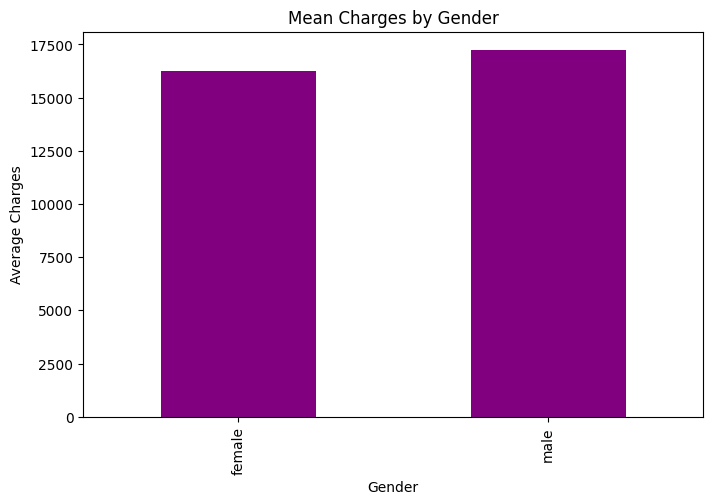

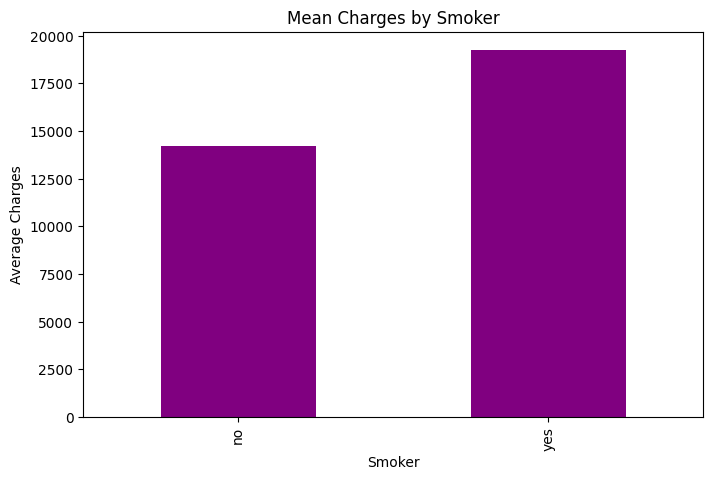

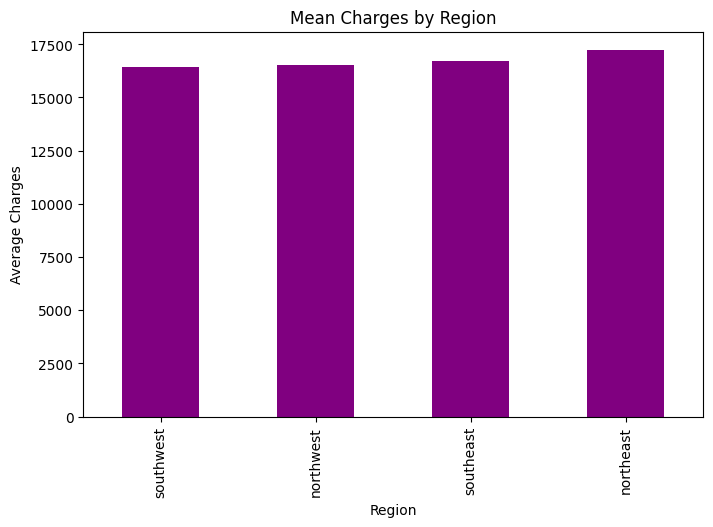

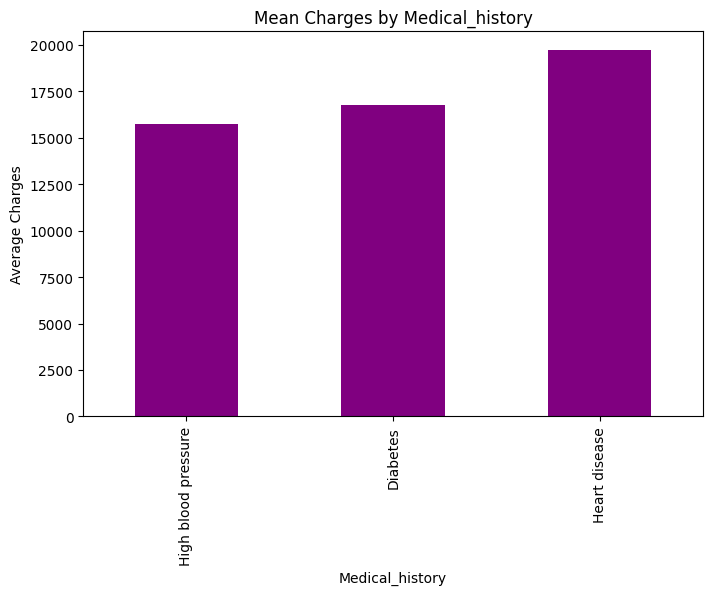

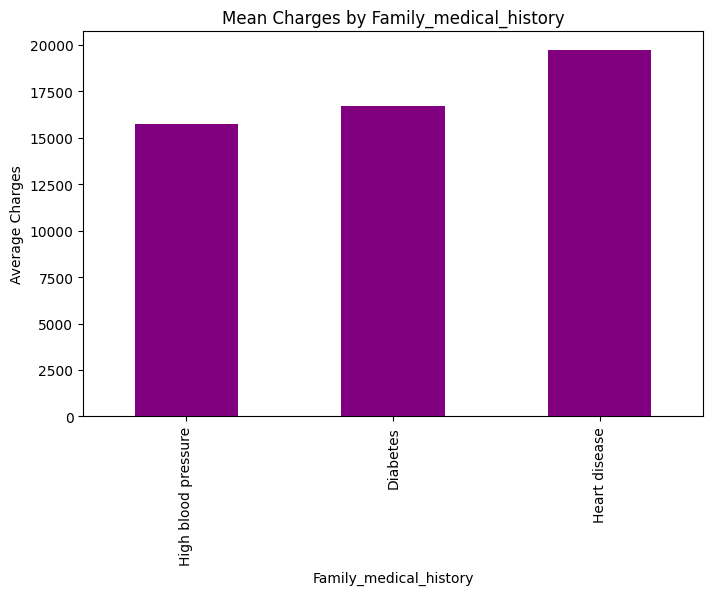

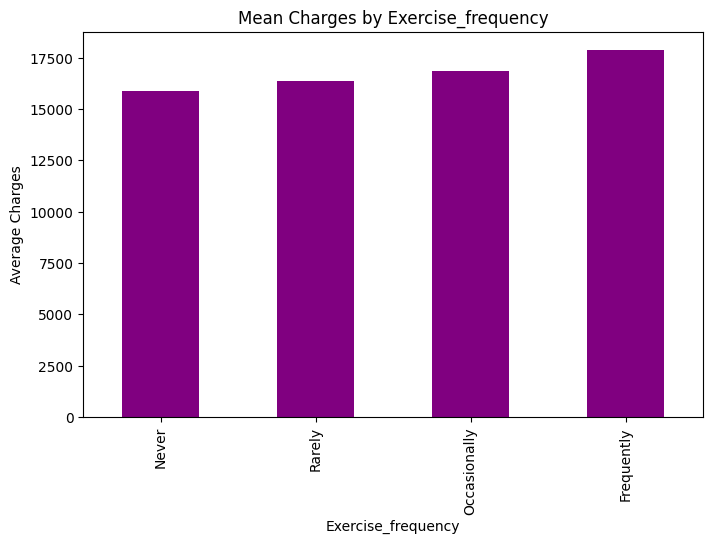

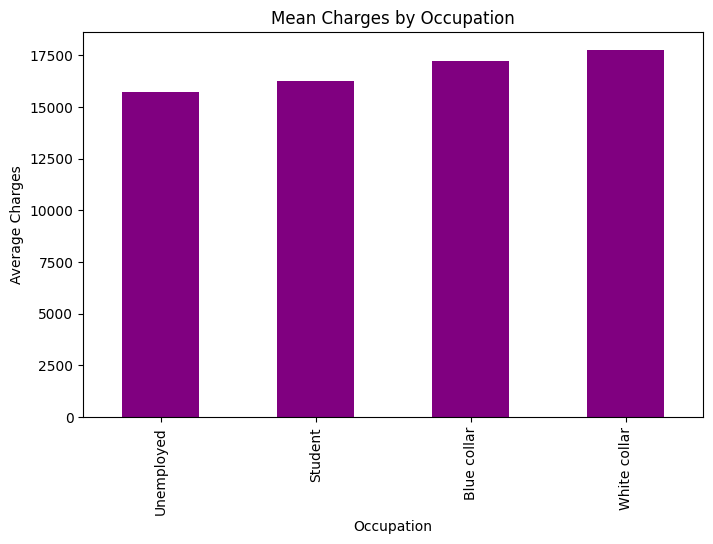

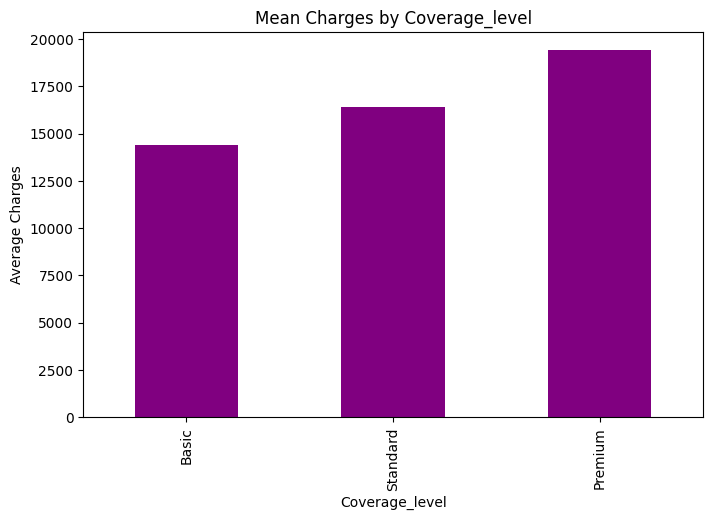

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    df.groupby(col)[target_col].mean().sort_values().plot(kind="bar", color="purple")
    plt.title(f"Mean {target_col} by {col}")
    plt.ylabel(f"Average {target_col}")
    plt.show()
    plt.close()

Correlation Heatmap

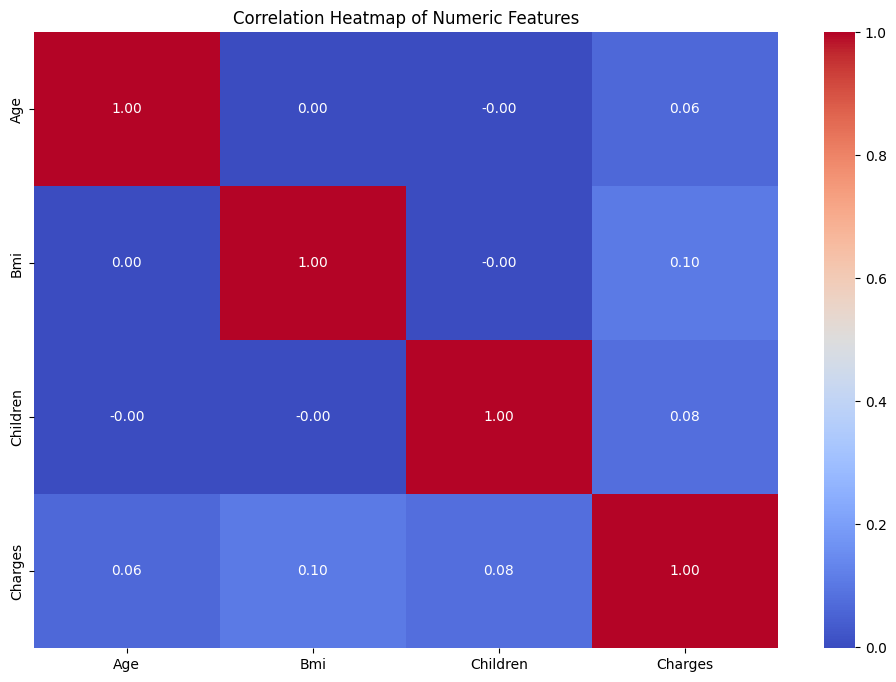

In [ ]:
plt.figure(figsize=(12, 8))
corr = df[num_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
plt.close()
